# TP : Classification des Manuscrits Arabes : Comparaison de Modèles CNN Simples et Complexes


# Implémentation d'un modèle de classification d'images avec Keras et le jeu de données 


## <span style="color:blue;">Les Manuscrits Arabes Digits :</span>


## Modele simple :


### Implémentation d'un modèle de classification d'images avec Keras et le jeu de données 


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend as K

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D, BatchNormalization

### Préparation et Chargement des Données pour la Reconnaissance des Caractères Manuscrits Arabes


In [6]:
# 1. Load and Prepare Arabic Handwritten Characters Data
def get_and_prepare_data_arabic():
    # Load your dataset here (assuming it's structured similarly to MNIST)
    # For instance:
    # (X_train, y_train), (X_test, y_test) = load_arabic_dataset()  # Load function should be defined as per dataset format
    
    # Mock loading if dataset format is unknown; replace this with actual load code
    X_train = pd.read_csv("C:/Users/PC/Desktop/td devoirs/Deep Learning/TDs/TP CNN/Dataset/csvTrainImages 60k x 784.csv").values
    y_train = pd.read_csv("C:/Users/PC/Desktop/td devoirs/Deep Learning/TDs/TP CNN/Dataset/csvTrainLabel 60k x 1.csv").values
    X_test = pd.read_csv("C:/Users/PC/Desktop/td devoirs/Deep Learning/TDs/TP CNN/Dataset/csvTestImages 10k x 784.csv").values
    y_test = pd.read_csv("C:/Users/PC/Desktop/td devoirs/Deep Learning/TDs/TP CNN/Dataset/csvTestLabel 10k x 1.csv").values
    
    # Reshape to be [samples][width][height][channels]
    X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
    X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')
    
    # Normalize to the range [0, 1]
    X_train /= 255
    X_test /= 255
    
    # One-hot encode the labels
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)
    num_classes = y_test.shape[1]
    
    return (X_train, y_train), (X_test, y_test), num_classes



### Chargement du Jeu de Données de digits Manuscrits Arabes

In [7]:
# Load Arabic dataset
(X_train, y_train), (X_test, y_test), num_classes = get_and_prepare_data_arabic()

### Définition d'un Modèle Convolutif Simple pour la Classification des digits Manuscrits

In [8]:
def simple_model():
    model = Sequential()
    
    # First convolutional layer with fewer filters
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # Second convolutional layer with pooling
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # Flattening and dense layer for classification
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))  # Dropout to reduce overfitting
    
    # Output layer
    model.add(Dense(num_classes, activation='softmax'))
    
    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model


### Création et Résumé du Modèle Convolutif Simple

In [9]:
# Create the simple model
model = simple_model()
print(model.summary())

C:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

None


### Entraînement du Modèle de Classification des digits arabic Manuscrits

In [10]:
# 3. Train the Model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=128)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 34s 62ms/step - accuracy: 0.8780 - loss: 0.4163 - val_accuracy: 0.9856 - val_loss: 0.0447
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 28s 60ms/step - accuracy: 0.9863 - loss: 0.0469 - val_accuracy: 0.9855 - val_loss: 0.0455
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 29s 61ms/step - accuracy: 0.9896 - loss: 0.0364 - val_accuracy: 0.9880 - val_loss: 0.0361
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 29s 61ms/step - accuracy: 0.9915 - loss: 0.0282 - val_accuracy: 0.9897 - val_loss: 0.0309
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 28s 60ms/step - accuracy: 0.9931 - loss: 0.0246 - val_accuracy: 0.9909 - val_loss: 0.0288
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 29s 62ms/step - accuracy: 0.9934 - loss: 0.0214 - val_accuracy: 0.9907 - val_loss: 0.0324
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 31s 65ms/step - accuracy: 0.9940 - loss: 0.0203 - val_accuracy: 0.9905 - val_loss: 0.0323
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 29s 62ms/step - accuracy: 0.9941 - loss: 0.0183 - 

### Évaluation du Modèle et Visualisation des Résultats

In [11]:
# 4. Evaluate and Plot Results
_, acc = model.evaluate(X_test, y_test, verbose=0)
print('> Accuracy: %.3f' % (acc * 100.0))

> Accuracy: 99.050


### Visualisation de l'Exactitude et de la Perte du Modèle au Cours des Époques

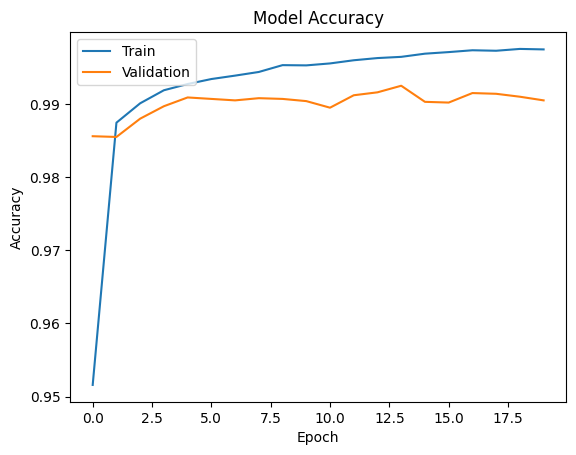

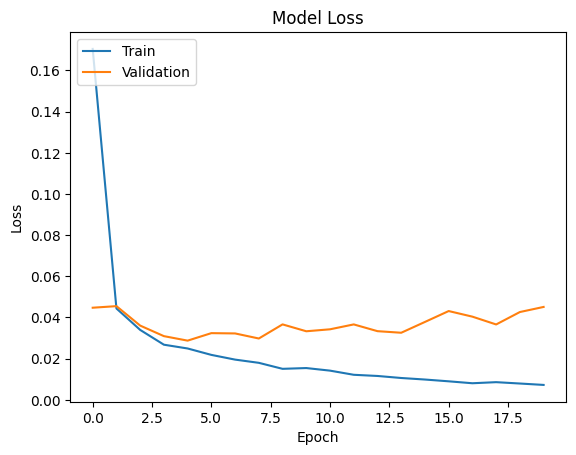

In [12]:
# Plot accuracy and loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Modele Complexe :


### Définition d'une Nouvelle Architecture de Modèle Convolutif pour la Classification

In [13]:
# 2. Define a New Model Architecture
def custom_model():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(BatchNormalization())
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    
    # Compile with a different optimizer
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', 'Precision', 'Recall'])
    return model



### Création et Résumé du Modèle Convolutif Simple

In [14]:
# Create the model
model = custom_model()
print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 26, 26, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 10, 10, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 10, 10, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 3200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         819,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 915,338 (3.49 MB)

 Trainable params: 915,018 (3.49 MB)

 Non-trainable params: 320 (1.25 KB)

None


### Entraînement du Modèle de Classification des digits arabic Manuscrits

In [15]:
# 3. Train the Model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=128)


Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 119s 246ms/step - Precision: 0.9299 - Recall: 0.9121 - accuracy: 0.9196 - loss: 0.3329 - val_Precision: 0.9780 - val_Recall: 0.9763 - val_accuracy: 0.9773 - val_loss: 0.0885
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 106s 226ms/step - Precision: 0.9869 - Recall: 0.9844 - accuracy: 0.9854 - loss: 0.0521 - val_Precision: 0.9900 - val_Recall: 0.9896 - val_accuracy: 0.9899 - val_loss: 0.0371
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 104s 222ms/step - Precision: 0.9901 - Recall: 0.9882 - accuracy: 0.9890 - loss: 0.0420 - val_Precision: 0.9905 - val_Recall: 0.9894 - val_accuracy: 0.9901 - val_loss: 0.0414
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 109s 233ms/step - Precision: 0.9919 - Recall: 0.9906 - accuracy: 0.9911 - loss: 0.0300 - val_Precision: 0.9923 - val_Recall: 0.9920 - val_accuracy: 0.9920 - val_loss: 0.0354
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 137s 292ms/step - Precision: 0.9918 - Recall: 0.9908 - accuracy: 0.9913 - loss: 0.0320 - val_Precision: 

### Évaluation du Modèle et Visualisation des Résultats

In [17]:
# Evaluate and get the results as a list
results = model.evaluate(X_test, y_test, verbose=0)

# Access accuracy, assuming it's the second value in the list
acc = results[1]  # adjust the index if accuracy isn't the second metric

print('> Accuracy: %.3f' % (acc * 100.0))


> Accuracy: 99.200


In [18]:
print('Evaluation results:', results)


Evaluation results: [0.04561628773808479, 0.9919992089271545, 0.9920983910560608, 0.9919992089271545]


### Visualisation de l'Exactitude et de la Perte du Modèle au Cours des Époques

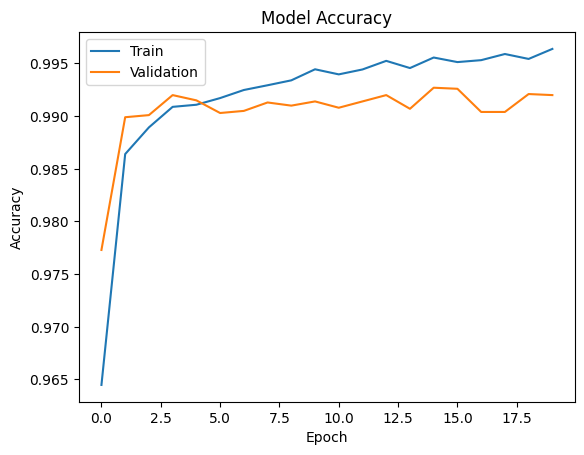

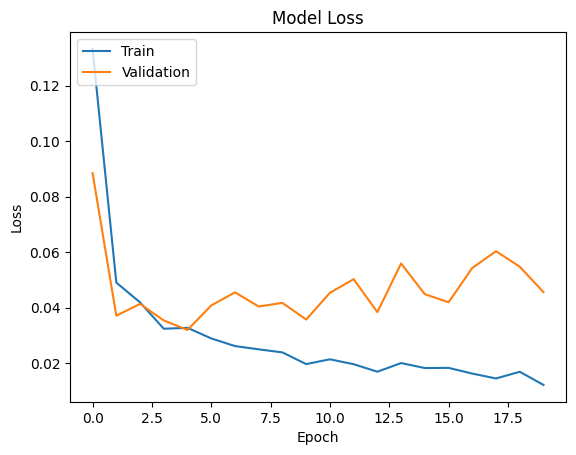

In [19]:
# Plot accuracy and loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### Visualisation et Préparation de Digits Arabes pour la Prédiction

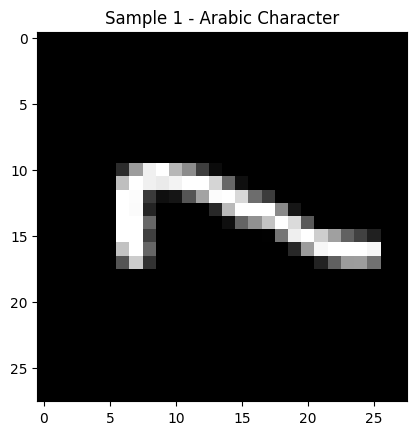

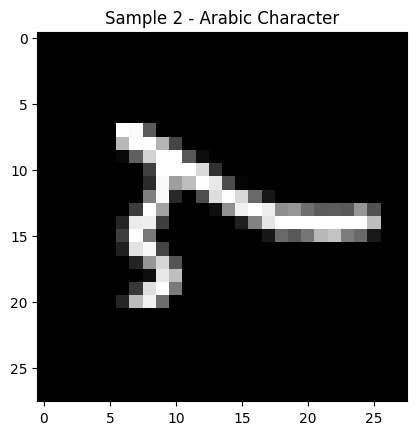

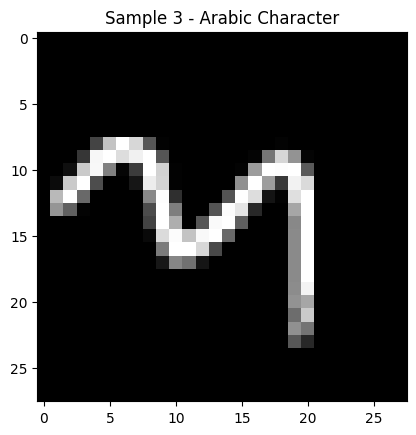

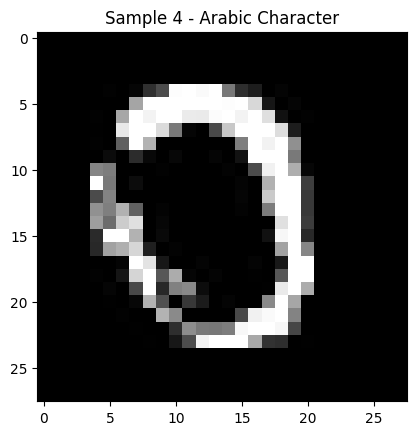

Shape of samples to predict: (4, 28, 28, 1)


In [26]:
# Select a few random samples to visualize
use_samples = [1, 2, 3, 4]  # Choose indices that represent Arabic characters in your dataset
samples_to_predict = []

# Display and prepare samples for prediction
for sample in use_samples:
    # Reshape each sample to 28x28 if needed and plot
    reshaped_image = X_train[sample].reshape((28, 28))  # Modify dimensions if different
    plt.imshow(reshaped_image, cmap='gray')  # Use grayscale for visibility
    plt.title(f"Sample {sample} - Arabic Character")
    plt.show()
    
    # Append the sample to the list for prediction
    samples_to_predict.append(X_train[sample])

# Convert list to numpy array for model input
samples_to_predict = np.array(samples_to_predict)

# Ensure shape is compatible with model input
print("Shape of samples to predict:", samples_to_predict.shape)

### Visualisation et Préparation de Digits Arabes pour la Prédiction

## <span style="color:blue;"> Les Manuscrits Arabes Caractères :</span>


## Modele simple :


### Chargement et Préparation des Données de Caractères Manuscrits Arabes

In [2]:
# 1. Load and Prepare Arabic Handwritten Characters Data
def get_and_prepare_data_arabic_chars():
    # Load your dataset here (assuming it's structured similarly to MNIST)
    # For instance:
    # (X_train, y_train), (X_test, y_test) = load_arabic_dataset()  # Load function should be defined as per dataset format
    
    # Mock loading if dataset format is unknown; replace this with actual load code
    X_train = pd.read_csv("C:/Users/PC/Desktop/td devoirs/Deep Learning/TDs/TP CNN/Dataset/Arabic Handwritten Characts Dataset CSV/csvTrainImages 13440x1024.csv").values
    y_train = pd.read_csv("C:/Users/PC/Desktop/td devoirs/Deep Learning/TDs/TP CNN/Dataset/Arabic Handwritten Characts Dataset CSV/csvTrainLabel 13440x1.csv").values
    X_test = pd.read_csv("C:/Users/PC/Desktop/td devoirs/Deep Learning/TDs/TP CNN/Dataset/Arabic Handwritten Characts Dataset CSV/csvTestImages 3360x1024.csv").values
    y_test = pd.read_csv("C:/Users/PC/Desktop/td devoirs/Deep Learning/TDs/TP CNN/Dataset/Arabic Handwritten Characts Dataset CSV/csvTestLabel 3360x1.csv").values
    
    # Reshape to be [samples][width][height][channels]
    X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
    X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')
    
    # Normalize to the range [0, 1]
    X_train /= 255
    X_test /= 255
    
    # One-hot encode the labels
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)
    num_classes = y_test.shape[1]
    
    return (X_train, y_train), (X_test, y_test), num_classes



### Chargement et Préparation des Données de Caractères Manuscrits Arabes

In [9]:
def get_and_prepare_data_arabic_chars():
    # Load dataset
    X_train = pd.read_csv("C:/Users/PC/Desktop/td devoirs/Deep Learning/TDs/TP CNN/Dataset/Arabic Handwritten Characts Dataset CSV/csvTrainImages 13440x1024.csv").values
    y_train = pd.read_csv("C:/Users/PC/Desktop/td devoirs/Deep Learning/TDs/TP CNN/Dataset/Arabic Handwritten Characts Dataset CSV/csvTrainLabel 13440x1.csv").values
    X_test = pd.read_csv("C:/Users/PC/Desktop/td devoirs/Deep Learning/TDs/TP CNN/Dataset/Arabic Handwritten Characts Dataset CSV/csvTestImages 3360x1024.csv").values
    y_test = pd.read_csv("C:/Users/PC/Desktop/td devoirs/Deep Learning/TDs/TP CNN/Dataset/Arabic Handwritten Characts Dataset CSV/csvTestLabel 3360x1.csv").values
    
    # Reshape to be [samples][width][height][channels]
    X_train = X_train.reshape(X_train.shape[0], 32, 32, 1).astype('float32')
    X_test = X_test.reshape(X_test.shape[0], 32, 32, 1).astype('float32')
    
    # Normalize to the range [0, 1]
    X_train /= 255
    X_test /= 255
    
    # One-hot encode the labels
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)
    num_classes = y_test.shape[1]
    
    return (X_train, y_train), (X_test, y_test), num_classes


In [10]:
# Load Arabic dataset
(X_train, y_train), (X_test, y_test), num_classes = get_and_prepare_data_arabic_chars()

In [12]:
num_classes

29

### Définition d'une Nouvelle Architecture de Modèle simple Convolutif pour la Classification

In [11]:
def simple_model_characts(num_classes):
    model = Sequential()
    # First convolutional layer
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # Second convolutional layer
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # Flatten the output for the fully connected layer
    model.add(Flatten())
    
    # Dense layer
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))  # Dropout for regularization
    
    # Output layer
    model.add(Dense(num_classes, activation='softmax'))
    
    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

### Création et Résumé du Modèle Convolutif simple

In [13]:
# Create the model
model = simple_model_characts(num_classes)
print(model.summary())

C:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 29)                  │           3,741 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 317,597 (1.21 MB)

 Trainable params: 317,597 (1.21 MB)

 Non-trainable params: 0 (0.00 B)

None


### Entraînement du Modèle(simple) pour la Classification des Caractères Manuscrits Arabes

In [14]:
# 3. Train the Model
history_characts = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=128)

Epoch 1/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 15s 95ms/step - accuracy: 0.1476 - loss: 2.9524 - val_accuracy: 0.5728 - val_loss: 1.5295
Epoch 2/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 9s 90ms/step - accuracy: 0.4673 - loss: 1.6610 - val_accuracy: 0.7261 - val_loss: 0.9252
Epoch 3/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 10s 90ms/step - accuracy: 0.6179 - loss: 1.1414 - val_accuracy: 0.8011 - val_loss: 0.6813
Epoch 4/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 9s 87ms/step - accuracy: 0.7029 - loss: 0.8898 - val_accuracy: 0.8389 - val_loss: 0.5537
Epoch 5/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 9s 89ms/step - accuracy: 0.7486 - loss: 0.7432 - val_accuracy: 0.8577 - val_loss: 0.4633
Epoch 6/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 9s 86ms/step - accuracy: 0.7777 - loss: 0.6683 - val_accuracy: 0.8779 - val_loss: 0.4201
Epoch 7/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 9s 86ms/step - accuracy: 0.8165 - loss: 0.5611 - val_accuracy: 0.8872 - val_loss: 0.3743
Epoch 8/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 9s 87ms/step - accuracy: 0.8334 - loss: 0.4940 - val_ac

### Evaluation du Modèle(simple) pour la Classification des Caractères Manuscrits Arabes

In [15]:
# evaluate model

_ , acc = model.evaluate(X_test, y_test, verbose=0)

In [16]:
print('> %.3f' % (acc * 100.0))

> 92.528


### Visualisation de l'Exactitude et de la Perte du Modèle(simple) pour les Caractères Manuscrits Arabes

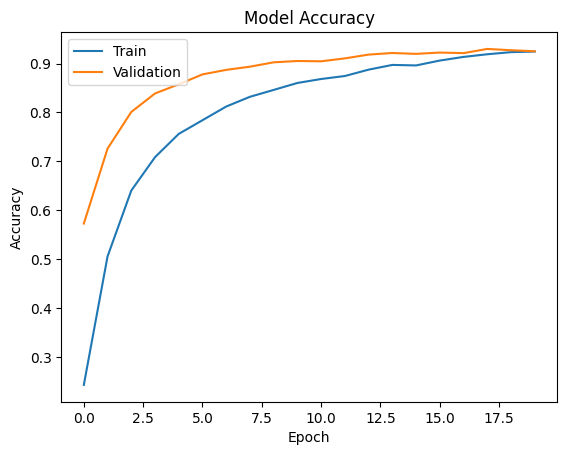

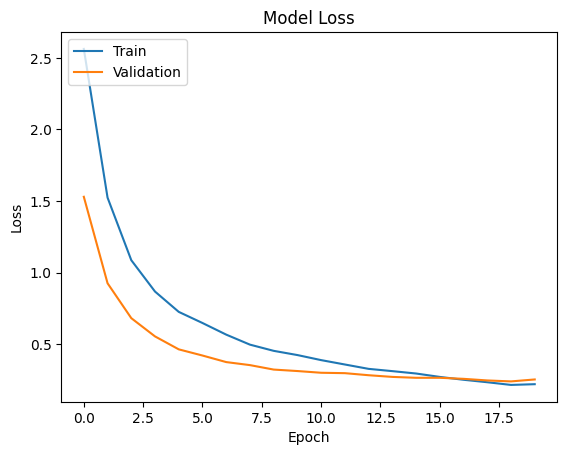

In [18]:
# Plot accuracy and loss
plt.plot(history_characts.history['accuracy'])
plt.plot(history_characts.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history_characts.history['loss'])
plt.plot(history_characts.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### Visualisation et Préparation de Caractéres Arabes pour la Prédiction

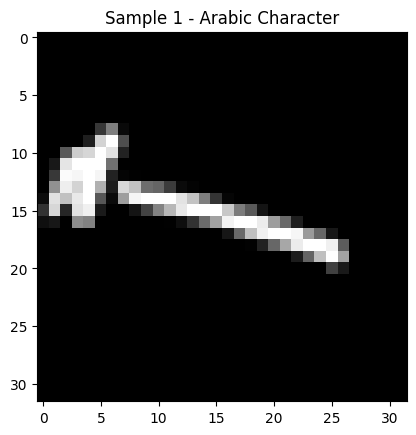

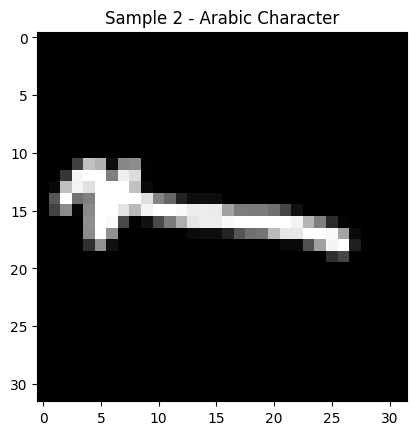

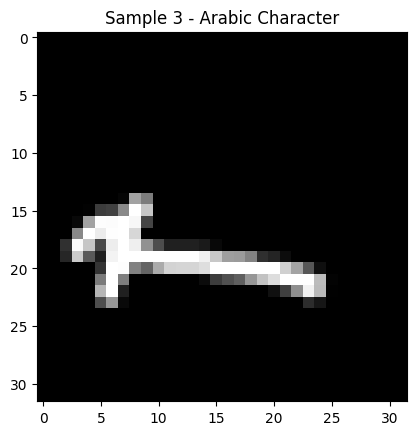

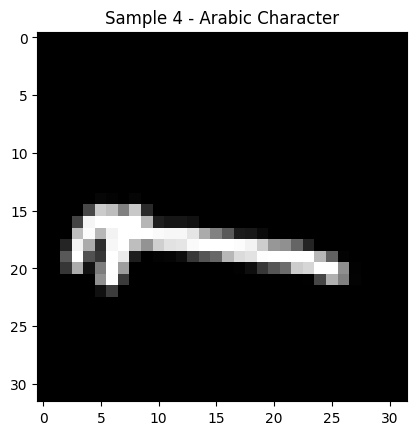

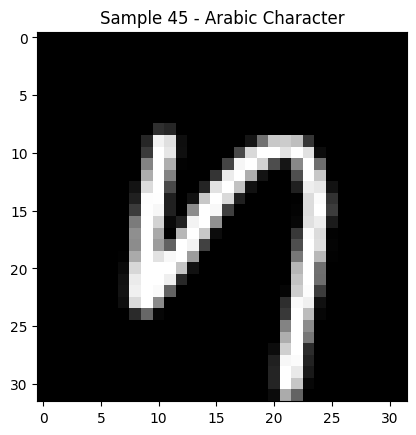

Shape of samples to predict: (5, 32, 32, 1)


In [26]:
# Select a few random samples to visualize
use_samples = [1, 2, 3, 4,45]  # Choose indices that represent Arabic characters in your dataset
samples_to_predict = []

# Display and prepare samples for prediction
for sample in use_samples:
    # Reshape each sample to 28x28 if needed and plot
    reshaped_image = X_train[sample].reshape((32, 32))  # Modify dimensions if different
    plt.imshow(reshaped_image, cmap='gray')  # Use grayscale for visibility
    plt.title(f"Sample {sample} - Arabic Character")
    plt.show()
    
    # Append the sample to the list for prediction
    samples_to_predict.append(X_train[sample])

# Convert list to numpy array for model input
samples_to_predict = np.array(samples_to_predict)

# Ensure shape is compatible with model input
print("Shape of samples to predict:", samples_to_predict.shape)


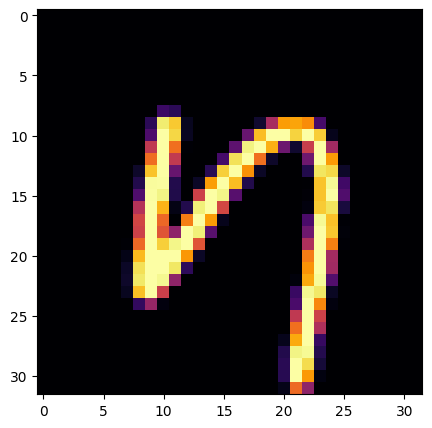

In [28]:
# Explore the first image
image =  X_train[45]

plt.figure(figsize=(5,5))
plt.imshow(image, cmap='inferno')
plt.show()

## Modele Compplexe :


### Définition d'une Nouvelle Architecture de Modèle complexe Convolutif pour la Classification

In [41]:
def larger_model_characts(num_classes):
    model = Sequential()
    
    # First convolutional layer with padding
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 1), padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # Second convolutional layer with padding
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # Third convolutional layer with padding
    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # Fourth convolutional layer with padding
    model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))
    
    # Flatten and fully connected layers
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    # Compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model


### Création et Résumé du Modèle Convolutif complexe

In [42]:
# Create the model
model_charats_large = larger_model_characts(num_classes)
print(model_charats_large.summary())

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 32, 32, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 4, 4, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 256)                 │       1,048,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 29)                  │           3,741 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,473,309 (5.62 MB)

 Trainable params: 1,473,309 (5.62 MB)

 Non-trainable params: 0 (0.00 B)

None


### Entraînement du Modèle(complexe) pour la Classification des Caractères Manuscrits Arabes

In [43]:
history_characts = model_charats_large.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=128,
    verbose=1
)

Epoch 1/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 32s 247ms/step - accuracy: 0.1482 - loss: 2.9049 - val_accuracy: 0.6282 - val_loss: 1.0997
Epoch 2/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 26s 245ms/step - accuracy: 0.5941 - loss: 1.1609 - val_accuracy: 0.7702 - val_loss: 0.6374
Epoch 3/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 26s 247ms/step - accuracy: 0.7385 - loss: 0.7338 - val_accuracy: 0.8511 - val_loss: 0.4604
Epoch 4/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 26s 245ms/step - accuracy: 0.8176 - loss: 0.5212 - val_accuracy: 0.8952 - val_loss: 0.3188
Epoch 5/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 26s 243ms/step - accuracy: 0.8774 - loss: 0.3737 - val_accuracy: 0.9047 - val_loss: 0.2784
Epoch 6/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 41s 242ms/step - accuracy: 0.8906 - loss: 0.3248 - val_accuracy: 0.9169 - val_loss: 0.2755
Epoch 7/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 26s 243ms/step - accuracy: 0.9114 - loss: 0.2673 - val_accuracy: 0.9283 - val_loss: 0.2450
Epoch 8/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 25s 241ms/step - accuracy: 0.9280 - loss: 0

### Visualisation de l'Exactitude et de la Perte du Modèle(complexe) pour les Caractères Manuscrits Arabes

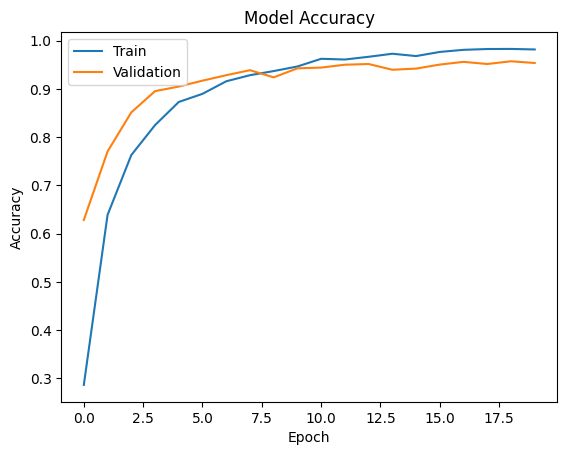

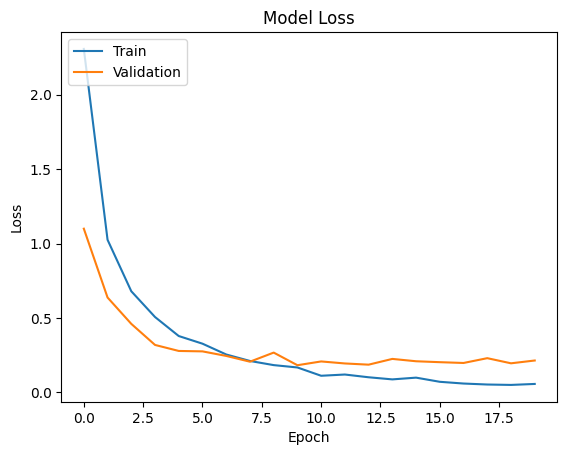

In [44]:
# Plot accuracy and loss
plt.plot(history_characts.history['accuracy'])
plt.plot(history_characts.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history_characts.history['loss'])
plt.plot(history_characts.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### Visualisation et Préparation de Caractéres Arabes pour la Prédiction

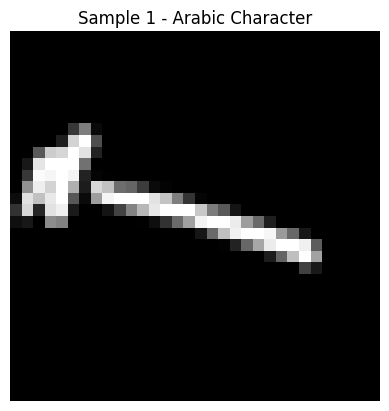

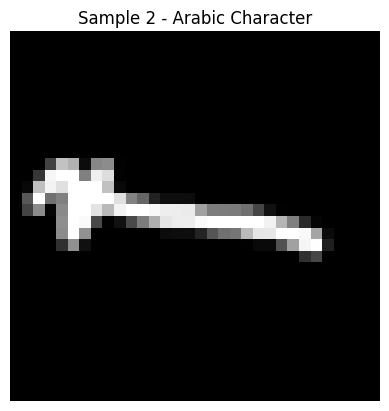

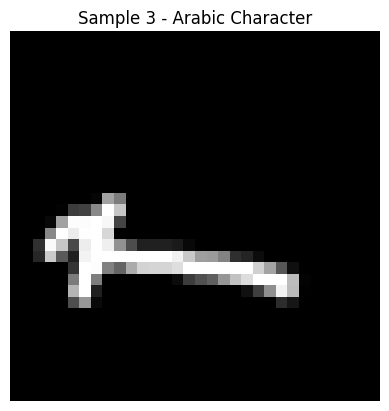

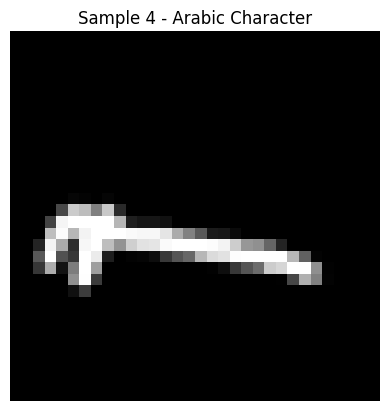

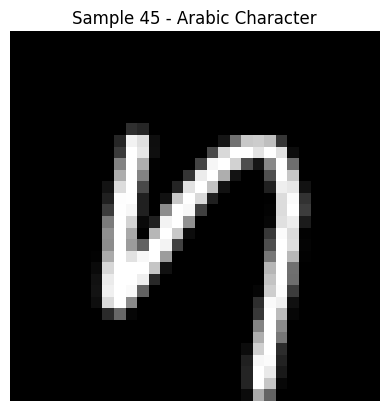

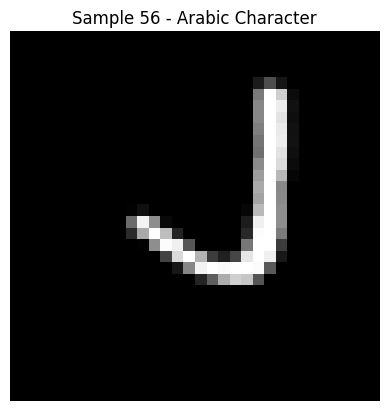

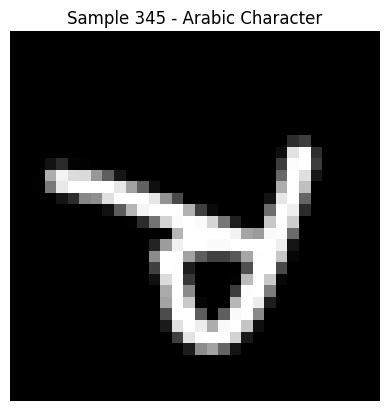

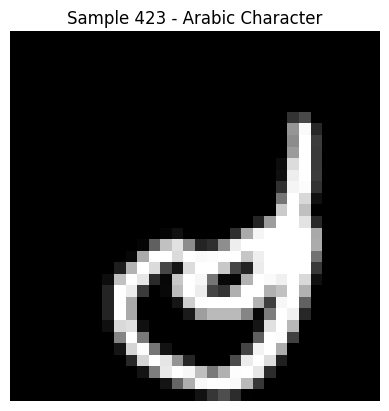

Shape of samples to predict: (8, 32, 32, 1)


In [46]:
# Select a few random samples to visualize
use_samples = [1, 2, 3, 4, 45,56, 345, 423]  # Choose indices that represent Arabic characters in your dataset
samples_to_predict = []

# Display and prepare samples for prediction
for sample in use_samples:
    # Reshape each sample to 32x32 (assuming that's the required input shape)
    reshaped_image = X_train[sample].reshape((32, 32))  # Modify dimensions if different
    plt.imshow(reshaped_image, cmap='gray')  # Use grayscale for visibility
    plt.title(f"Sample {sample} - Arabic Character")
    plt.axis('off')  # Hide axes for better visualization
    plt.show()
    
    # Append the sample to the list for prediction
    samples_to_predict.append(X_train[sample])

# Convert list to numpy array for model input
samples_to_predict = np.array(samples_to_predict)

# Ensure shape is compatible with model input
print("Shape of samples to predict:", samples_to_predict.shape)
